### 1. About Dataset
This dataset contains various attributes of songs, such as their audio features, popularity, artist, album, release date, and more.  It allows for in-depth analysis and offers valuable insights into music trends.
#### Features
- **genre**: the actual genre of each track
- **artist_name**: Artist(s) responsible for creating the track
- **track_name**: actual name of the track
- **track_id**: the actual id of the track
- **popularity**: represent the popularity of the track
- **acousticness**: An acoustic confidence measure of each track ranging from 0.0 to 1.0 is provided for the track. 1.0 signifies a significant level.
- **danceability**: the track's suitability for dancing, which is determined by analyzing various musical elements (0.0 to 1.0)
- **duration_ms**: the actual duration of the track in miliseconds
- **energy**: the intensity and activity level of a track (0.0 to 1.0), with higher values indicating tracks that are more energetic.
- **instrumentalness**: the probability of a track being instrumental
- **key**: indicates the key in which the track is played. It's a numerical value that falls within a range of 0 to 11, representing different musical keys.
- **liveness**: Determines the existence of an engaged crowd during the recording. The value ranges from 0.0 to 1.0, where higher values suggest a greater likelihood of the track being performed live. 
- **loudness**: the perceived volume or intensity of a track
- **mode**: the actual mode of each track ( major, minor)
- **speechiness**: It identifies the occurrence of spoken words in a track. The attribute value is closer to 1.0 when the recording is more speech-like, such as in a talk show, audio book, or poetry. Values exceeding 0.66 indicate tracks that likely consist predominantly of spoken words. Values ranging from 0.33 to 0.66 indicate tracks that potentially have a combination of music and speech, such as rap music, either in sections or layered. Values that fall below 0.33 are typically indicative of music and other tracks that do not resemble speech.
- **tempo**: the speed or pace at which the track is played or performed.
- **time_signature**: The time-signature of a particular track, which determines the number of beats in each measure and the type of note that receives one beat.
- **variance**: The uplifting nature of the song's musical content





### 2. Exploratory Data Analysis
Exploring the dataset is an essential step in the early stages of a data analysis project. It allows for a thorough understanding of the data, identification of any potential problems, and discovery of meaningful patterns. In this section, we will thoroughly examine the dataset to establish a solid foundation for future modeling and analysis.

In [1]:
# import libraries for data processing
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### a/ Data Loading and Inspection:
    

- The dataset SpotifyFeatures.cvs will be loaded into a Pandas DataFrame

In [2]:
# Load the 'SpotifyFeatures.csv' dataset into a Pandas DataFrame
data = pd.read_csv('SpotifyFeatures.csv')



- Upon first examination, the dataset's dimensions, including the number of rows and columns, can be determined.

In [3]:
# Display the number of rows and columns in the dataset
print(data.shape)

(232725, 18)


- The first few rows will be displayed to get a glimpse of the data's structure and content.

In [4]:
# Display the first 5 rows of the dataset
# This is useful to understand the data's structure, column names, and sample values
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
# drop column track_id because our model does not need this information
data = data.drop(columns=['track_id'])

#### b/ Data Cleaning and Preprocessing

- **Handling Missing Values**: A thorough assessment of missing values will be conducted. If necessary, appropriate imputation or removal strategies will be applied.

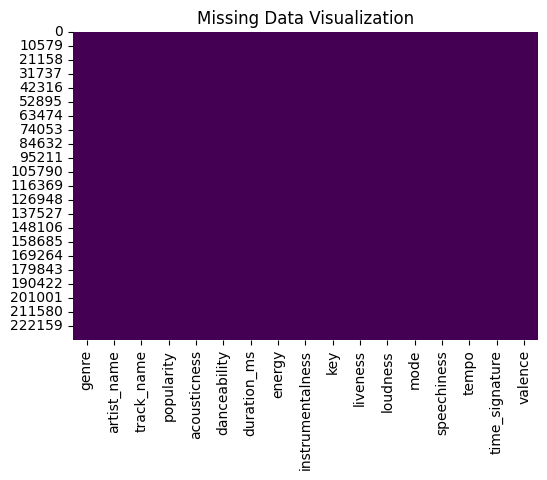

Missing Data Counts:
 genre               0
artist_name         0
track_name          1
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [6]:
# Identify missing data
missing_data = data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Print missing data counts
print("Missing Data Counts:\n", missing_data)

Obviously, there is no missing values in this dataset, therefore, there is no need to do anything in this step

- **Identifying and Addressing Duplicates**:
Duplicate rows will be detected and removed to ensure data integrity.

In [7]:
# Identify duplicate data
duplicate_rows = data[data.duplicated()]

# Display duplicate rows if they exist
if not duplicate_rows.empty:
    print("\nDuplicated Rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicated rows found.")

# Print the count of duplicate rows
print(f"\nNumber of Duplicated Rows: {len(duplicate_rows)}")


No duplicated rows found.

Number of Duplicated Rows: 0


There is no duplicated rows, so we do not need to drop any rows.

#### Data Information

In [8]:
# the information of first ten columns
data[data.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   popularity        232725 non-null  int64  
 4   acousticness      232725 non-null  float64
 5   danceability      232725 non-null  float64
 6   duration_ms       232725 non-null  int64  
 7   energy            232725 non-null  float64
 8   instrumentalness  232725 non-null  float64
 9   key               232725 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 17.8+ MB


In [9]:
# The information of remaining columns
data[data.columns[10:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   liveness        232725 non-null  float64
 1   loudness        232725 non-null  float64
 2   mode            232725 non-null  object 
 3   speechiness     232725 non-null  float64
 4   tempo           232725 non-null  float64
 5   time_signature  232725 non-null  object 
 6   valence         232725 non-null  float64
dtypes: float64(5), object(2)
memory usage: 12.4+ MB


In [10]:
numerical_columns = data.select_dtypes(include=['number']).columns
num_numerical_columns = len(numerical_columns)

print(f"Number of columns with numerical values: {num_numerical_columns}")

Number of columns with numerical values: 11


In [11]:
integer_columns = [col for col in data.columns if pd.api.types.is_integer_dtype(data[col])]
num_integer_columns = len(integer_columns)

print(f'Number of columns with integer values: {num_integer_columns}')

Number of columns with integer values: 2


### Column and Dtype Logic
This dataset contains both numeric and categorical data types:

- **Numeric Columns**: These columns are used for quantitative measurements and include both integers (int64) and floating-point numbers (float64). These floating-point columns typically represent various audio characteristics of tracks, while the integer columns represent the popularity and the duration of tracks in milliseconds.
- **Categorical Columns**: These columns contain qualitative data (object) and are used to represent categories such as key, mode, and so on.

Numeric and Category Columns
- **Numeric Columns**: 11 (9 floating point + 2 integers)
    - **Integers (int64)**: There are 2 columns containing integer data, which includes measurements like popularity and duration_ms
    - **Floating-point**: There are 9 columns containing floating-point data, such as speechiness, tempo and so on.

- **Categorical Columns**: 6 
    - There are 6 columns containing categorical data (object), representing categories such as genre, artist_name, track_name, key, mode, time_signature
    
The dataset provides a comprehensive overview of various factors that might influence the popularity level of a track, combining both quantitative and qualitative aspects. 

In [12]:
# Generating summary statistics of the numerical columns
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


#### General Evaluation for Numeric Values

In [13]:
# Select numeric data
numeric_data = data.select_dtypes(include='number').columns
print("numeric_data", numeric_data)
# Select categorical data
categorical_data = data.select_dtypes(exclude='number').columns
print("categorical_data", categorical_data)

numeric_data Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')
categorical_data Index(['genre', 'artist_name', 'track_name', 'key', 'mode', 'time_signature'], dtype='object')


In [14]:
for col in categorical_data:
    unique_values = data[col].unique()

    # Print unique values for the current column
    print(f"\nUnique Values in Column '{col}':")
    print(unique_values)

    # Optionally, print the value counts if needed
    # print(data[col].value_counts())


Unique Values in Column 'genre':
['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']

Unique Values in Column 'artist_name':
['Henri Salvador' 'Martin & les fées' 'Joseph Williams' ... 'Dharmasoul'
 'Swim' 'Jr Thomas & The Volcanos']

Unique Values in Column 'track_name':
["C'est beau de faire un Show" "Perdu d'avance (par Gad Elmaleh)"
 "Don't Let Me Be Lonely Tonight" ... 'P.O.P.' 'Burning Fire'
 "You Don't Have To Hurt No More"]

Unique Values in Column 'key':
['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B']

Unique Values in Column 'mode':
['Major' 'Minor']

Unique Values in Column 'time_signature':
['4/4' '5/4' '3/4' '1/4' '0/4']
